#Install

In [ ]:
!pip install -U nltk
!pip install pandas
!pip install hazm
!pip install sklearn
!pip install numpy
!pip install flair
!pip install stanfordnlp
!pip install torch

     |████████████████████████████████| 1.5 MB 10.5 MB/s 
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5
     |████████████████████████████████| 316 kB 11.1 MB/s 
     |████████████████████████████████| 233 kB 49.3 MB/s 
     |████████████████████████████████| 1.4 MB 49.5 MB/s 
  Created wheel for nltk: filename=nltk-3.3-py3-none-any.whl size=1394488 sha256=977f21e1a4fd6ce2fcdf4a6c4c006d1ac8e6286abd8040659ed75b907b405699
  Stored in directory: /root/.cache/pip/wheels/9b/fd/0c/d92302c876e5de87ebd7fc0979d82edb93e2d8d768bf71fac4
  Created wheel for libwapiti: filename=libwapiti-0.2.1-cp37-cp37m-linux_x86_64.whl size=154400 sha256=7cb2e4df3510b33c2f41c001b696b8818011e2a7260a4d35e417c0999f1256d4
  Stored in directory: /root/.cache/pip/wheels/ab/b2/5b/0fe4b8f5c0e65341e8ea7bb3f4a6ebabfe8b1ac31322392dbf
Successfully built nltk libwapiti
  Attempting uninstall: nltk
    Found existing installation: 

# Import

In [ ]:
import pandas as pd

from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.utils import shuffle

import seaborn as sns
import matplotlib.pyplot as plt
import stanfordnlp
import numpy as np
import dill
from urllib.parse import urlparse

import os.path
import joblib
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
from transformers import AutoConfig, AutoTokenizer, TFAutoModel

import os
import string
import pandas as pd
from hazm import *
import re
import numpy as np
from pathlib import Path
from google.colab import drive
import matplotlib.pyplot as plot
from keras.utils.vis_utils import plot_model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras import backend as K
from keras.callbacks import EarlyStopping, ModelCheckpoint
import dill
import math


from keras.wrappers.scikit_learn import KerasClassifier
from keras.regularizers import l1, l2
from keras import regularizers
from keras import metrics
from keras import backend as K
from sklearn.metrics import confusion_matrix

#Google drive

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#PS

In [ ]:
# -*- coding: utf-8 -*-
"""PSFeatureExtractor.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1-zwppOfr0Cr1k15U5cOBA8Kd3xdKSXWr
"""

# -*- coding: utf-8 -*-
"""BaseLineWithGridSearch.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1cxXw92aQZKvWJGmOdKIYGGXRMpK_XNvQ

# Import Required Libraries
"""
import nltk
from nltk import word_tokenize as nltk_word_tokenize
import string
import pandas as pd
import re
import numpy as np
from pathlib import Path
from google.colab import drive
import torch
import stanfordnlp
import itertools
import sklearn
from sklearn.model_selection import train_test_split
from hazm import *
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from difflib import SequenceMatcher
import warnings
warnings.filterwarnings('ignore')
from openpyxl import load_workbook
import joblib
from sklearn.feature_extraction.text import CountVectorizer
import os.path

nltk.download('punkt')

refute_hedge_reporte_words = ['جعلی',
                   'تقلب',
                   'فریب',
                   'حیله',
                   'کلاهبرداری',
                   'شیادی',
                   'دست انداختن',
                   'گول زدن',
                   'نادرست',
                   'غلط',
                   'کذب',
                   'ساختگی',
                   'قلابی',
                   'انکار',
                   'رد',
                   'تکذیب',
                   'تکذیب کردن',
                   'تکذیب شد',
                   'انکار کردن'
                   'انکار می کند',
                   'نه',
                   'با وجود',
                   'علیرغم',
                   'با اینکه',
                   'شک داشتن',
                   'تردید کردن',
                   'مظنون بودن',
                   'شک',
                   'تردید',
                   'دو دلی',
                   'گمان',
                   'به گزارش'
                   ,'ادعا شده'
                   ,'به قول معروف'
                   ,'بنا به گفته'
                   , 'ظاهرا'
                   ,'به نظر می رسد'
                   ,'ادعا'
                   ,'میتوانست'
                   ,'می تواند'
                   ,'از قرار معلوم'
                   ,'مشخصا'
                   ,'تا حد زیادی'
                   ,'احتمال دارد'
                   ,'شاید'
                   ,'به طور عمده'
                   ,'ممکن است'
                   ,'گویا'
                   ,'ممکن'
                   ,'اغلب'
                   ,'غالبا'
                   ,'احتمالا'
                   ,'احتمالاً'
                   ,'محتملا'
                   ,'گفته شده'
                   ,'گزارش داد'
                   ,'طبق گزارش'
                   ,'شایعه'
                   ,'شایعات'
                   ,'شایعه شده'
                   ,'قدری'
                   ,'تا حدی'
                   ,'تأیید نشده'
]

if __name__ == "__main__":
   # stuff only to run when not called via 'import' here
   pass

"""# Define Class"""

# -------------------------------------
class PSFeatureExtractor():
  # -------------------------------------
  def __init__(self, dataset_path, stopWord_path, polarity_dataset_path, stanford_models_path , use_google_drive = True, important_words = None
  	,claim_name="claim",headline_name="headline",label_name="label",question_name="question",part_name="part",load_data = True, data = None
  	,uniq_claims={}):
    self.dataset_path = dataset_path
    self.stopWord_path = stopWord_path
    self.polarity_dataset_path = polarity_dataset_path
    self.use_google_drive = use_google_drive
    self.stanford_models_path = stanford_models_path
    self.important_words = important_words
    self.clean_claims_headlines = []
    self.clean_claims = []
    self.clean_headlines = []
    self.claim_name= claim_name
    self.headline_name = headline_name
    self.question_name = question_name
    self.label_name = label_name
    self.part_name = part_name
    self.uniq_claims = uniq_claims

    self.fa_stop_words = self.__get_stop_words()
    print("before read")
    if load_data:
      self.claims, self.headlines, self.isQuestion,self.hasTowParts, self.labels =  self.__read_dataset(uniq_claims) 
    else:
      self.claims, self.headlines, self.isQuestion,self.hasTowParts, self.labels = self.__generate_dataset(data)
    print("after read")
    self.fa_punctuations = ['،','«','»',':','؛','ْ','ٌ','ٍ','ُ','ِ','َ','ّ','ٓ','ٰ','-','*']
    self.denied_words = self.fa_stop_words + list(string.punctuation) + list(self.fa_punctuations)
  # -------------------------------------
  def __get_stop_words(self):   
      normalizer = Normalizer()
      lineList = list()
      print(self.stopWord_path)
      with open(self.stopWord_path) as f:
        for line in f:
          lineList.append(normalizer.normalize(line.rstrip("\n\r")))
      return lineList
  # ---------------------------------------------------
  def clean_sentence(self, sentence):
    normalizer = Normalizer()
    shayee = normalizer.normalize("شایعه")
    clean_sentences = sentence
    re_pattern1 = "(/(\s)*"+ shayee +"(\s)*[0-9]+)|(/(\s)*شایعه(\s)*[0-9]+)"
    re_pattern2 = "/(\s)*[0-9]+"
    re_pattern3 = "\\u200c|\\u200d|\\u200e|\\u200b|\\u2067|\\u2069"
    x = re.search(re_pattern1, sentence)
    if (x):
      clean_sentences = re.sub(re_pattern1, "", sentence)

    x = re.search(re_pattern2, clean_sentences)
    if (x):
      clean_sentences = re.sub(re_pattern2, "", clean_sentences)
        
    x = re.search(re_pattern3, clean_sentences)
    if (x):
      clean_sentences = re.sub(re_pattern3, "", clean_sentences)   
        
    punc_regex = re.compile('|'.join(map(re.escape, list(string.punctuation) + list(self.fa_punctuations))))

    clean_sentences = punc_regex.sub("", clean_sentences)

    return clean_sentences
  # ---------------------------------------------
  def __generate_dataset(self,data):
    claims = data[self.claim_name]
    headline = data[self.headline_name]
    b = np.char.find(claims, '?')
    isQuestion = np.zeros(claims.shape[0])
    isQuestion[np.where(b>0)] = 1
    hasTowParts = np.zeros(claims.shape[0])
    return claims, headlines,isQuestion,hasTowParts ,labels
  # ---------------------------------------------
  def __read_dataset(self,uniq_claims):
    df = pd.read_csv(self.dataset_path, encoding = 'utf-8')
    df = self.__remove_from_dataset(df,uniq_claims)
    claims = df[self.claim_name].values
    headlines = df[self.headline_name].values
    print("before")
    isQuestion = df[self.question_name].values
    print("after")
    hasTowParts = df[self.part_name].values
    labels = df[self.label_name].values
    print(isQuestion)
    assert (claims.shape == headlines.shape == isQuestion.shape == labels.shape == hasTowParts.shape), "The features size are not equal."
    print(claims.shape , headlines.shape ,isQuestion.shape,hasTowParts.shape ,labels.shape)
    return claims, headlines,isQuestion,hasTowParts ,labels
  # ---------------------------------------
  def __remove_from_dataset(self,df,uniq_claims):
    uni_number = 0
    if bool(uniq_claims):
      df['repeated']= np.zeros(len(df),dtype=int)
      for claim_index in range(len(df[self.claim_name])):
        if (df[self.claim_name][claim_index] in uniq_claims) and uniq_claims[df[self.claim_name][claim_index]] == df[self.headline_name][claim_index]:
          df['repeated'][claim_index] = 1
          print(df[self.claim_name][claim_index])
          print(df[self.headline_name][claim_index])
          uni_number +=1
      df.sort_values(by=['repeated'])
      print(df['repeated'])
    self.uniq_number = uni_number
    return df
  # ---------------------------------------

  def stanford_tokenize(self, root_model_path, just_get_tokenized_words = False): 
    
    nlp = stanfordnlp.Pipeline(lang='fa', models_dir= self.stanford_models_path, treebank=None, use_gpu=True) 
    # nlp = stanfordnlp.Pipeline(processors='tokenize,lemma', lang='fa', treebank=None, use_gpu=True)

    claims_processors_result = []
    headlines_processors_result = []
    claims_tokenize = []
    headlines_tokenize = []

    for i, (claim,headline) in enumerate(zip(self.claims,self.headlines)):
      clean_claim = self.clean_sentence(claim)
      self.clean_claims.append(clean_claim)
      doc = nlp(clean_claim) # Run the pipeline on input text
      claims_processors_result.append(doc.sentences[0].words)
      words = (obj.text for obj in doc.sentences[0].words)
      claims_tokenize.append(words)

      # headline
      clean_headline = self.clean_sentence(headline)
      self.clean_headlines.append(clean_headline)
      doc = nlp(clean_headline) # Run the pipeline on input text
      headlines_processors_result.append(doc.sentences[0].words)
      words = (obj.text for obj in doc.sentences[0].words)
      headlines_tokenize.append(words)
      self.clean_claims_headlines.append(clean_claim + ' ' + clean_headline)

    self.tokens_claims , self.tokens_headlines = self.clean_tokens(target_list = claims_tokenize), self.clean_tokens(target_list = headlines_tokenize)   
    if just_get_tokenized_words :                
      return self.tokens_claims , self.tokens_headlines 
# ghaGH
    return claims_processors_result , headlines_processors_result
  # ------------------------------------------------
  
  
  def clean_tokens(self, target_list):
    assert isinstance(target_list, (list)) == True , "Type of target_list is not correct. It has to be list."
    normalizer = Normalizer()
    #--------!!!! It was [] and the following was commented, I uncomment it
            
    clean_words = []

    for item in target_list:
      clean_words.append([i for i in item if normalizer.normalize(i) not in self.denied_words])

    return clean_words
  # --------------------------------------------------
  def hazm_tokenize(self):
    claims_result = []
    headlines_result = []
    
    for claim,headline in zip(self.claims,self.headlines):
      clean_claim = self.clean_sentence(claim)
      self.clean_claims.append(clean_claim)
      claims_result.append(word_tokenize(clean_claim))
      # headline
      clean_headline = self.clean_sentence(headline)
      self.clean_headlines.append(clean_headline)
      headlines_result.append(word_tokenize(clean_headline))

      self.clean_claims_headlines.append(clean_claim + ' ' + clean_headline)

    self.tokens_claims , self.tokens_headlines = self.clean_tokens(target_list = claims_result), self.clean_tokens(target_list = headlines_result)
    return self.tokens_claims , self.tokens_headlines

  # --------------------------------------------------
  def nltk_tokenize(self):
    claims_result = []
    headlines_result = []
    
    for claim,headline in zip(self.claims,self.headlines):
      clean_claim = self.clean_sentence(claim)
      self.clean_claims.append(clean_claim)
      claims_result.append(nltk_word_tokenize(clean_claim))
      
      # headline
      clean_headline = self.clean_sentence(headline)
      self.clean_headlines.append(clean_headline)
      headlines_result.append(nltk_word_tokenize(clean_headline))

      self.clean_claims_headlines.append(clean_claim + ' ' + clean_headline)
    self.tokens_claims , self.tokens_headlines = self.clean_tokens(target_list = claims_result), self.clean_tokens(target_list = headlines_result)
    return self.tokens_claims , self.tokens_headlines
  # --------------------------------------------------
  def clean_sentences(self):
    claims_result = []
    headlines_result = []
    for claim,headline in zip(self.claims,self.headlines):
      tokens = parsbert_tokenizer.tokenize(claim)
      clean_words = []
      for token in tokens:
          if token not in self.denied_words:
              clean_words.append(token)
      new_sentence_c = parsbert_tokenizer.convert_tokens_to_string(clean_words)
      self.clean_claims.append(new_sentence_c)
      
      # headline
      tokens = parsbert_tokenizer.tokenize(headline)
      clean_words = []
      for token in tokens:
          if token not in self.denied_words:
              clean_words.append(token)
      new_sentence_h = parsbert_tokenizer.convert_tokens_to_string(clean_words)
      self.clean_headlines.append(new_sentence_h)

      self.clean_claims_headlines.append(new_sentence_c + ' ' + new_sentence_h)
  # --------------------------------------------------
  def tf_idf(self):
    tfidf = TfidfVectorizer(sublinear_tf=True, min_df=10, norm='l2', ngram_range=(1, 2))
    features = tfidf.fit_transform(self.clean_claims_headlines).toarray() 
    return features
  # --------------------------------------------------
  def tf_idf(self):
    tfidf = TfidfVectorizer(sublinear_tf=True, min_df=10, norm='l2', ngram_range=(1, 2))
    features = tfidf.fit_transform(self.clean_claims_headlines).toarray() 
    return features
  # --------------------------------------------------
  def similarity(self):
    feature = []
    for i, (claim,headline) in enumerate(zip(self.clean_claims,self.clean_headlines)):
      ratio = SequenceMatcher(None, claim, headline).ratio()
      quick_ratio = SequenceMatcher(None, claim, headline).quick_ratio()
      real_quick_ratio = SequenceMatcher(None, claim, headline).real_quick_ratio()
      feature.append([ratio,quick_ratio,real_quick_ratio])
    return feature    
  # --------------------------------------------------
  def calc_important_words(self):
    assert (self.important_words != None), 'For calculating important words you should pass important words in initializer.'
    features = np.zeros((len(self.clean_claims_headlines), len(self.important_words)))
    for i in range(len(self.clean_claims_headlines)):
      for j in range(len(self.important_words)):
        if self.important_words[j] in self.clean_claims_headlines[i]:
            features[i][j] = 1
    return features
  # --------------------------------------------------
  def calculate_root_distance(self ,target_sentences = None): # target_sentences = clean_headlines
    
    if target_sentences == None:
      target_sentences = self.clean_headlines
    
    nlp = stanfordnlp.Pipeline(lang='fa', models_dir= self.stanford_models_path, treebank=None, use_gpu=True) 
    root_distance_feature = np.zeros((len(target_sentences),1))
    for index,headline in enumerate(target_sentences):
      root_distance_feature[index] = -1
      doc = nlp(headline)
      root = [(i,doc.sentences[0].words[i].text) for i in range(len(doc.sentences[0].words)) if  doc.sentences[0].words[i].dependency_relation == 'root' ]
      if(len(root) == 0):
        continue

      root_index,root_word = root[0]

      for word_index,word in enumerate(headline.split()) :
        target = [(i,refute_hedge_reporte_words[i]) for i in range(len(refute_hedge_reporte_words)) if  refute_hedge_reporte_words[i] == word]
        if(len(target) > 0):
          target_index, target_word =target[0]
          root_distance_feature[index] = abs(word_index - root_index)
          break
    return root_distance_feature
  # --------------------------------------------------
  def load_polarity_dataset(self):
    excel = load_workbook(filename = self.polarity_dataset_path)
    sheet = excel.active
    words_polarity_fa={}
    for row in sheet.iter_rows():
      if row[2].value == "Polarity" or row[2].value == None:
        continue
      words_polarity_fa[row[0].value] = row[2].value
    return words_polarity_fa  
  # --------------------------------------------------
  def calculate_polarity(self, target_sentences = None):
    words_polarity_fa = self.load_polarity_dataset()

    if target_sentences == None:
      target_sentences = zip(self.tokens_claims,self.tokens_headlines)

    # unzipping values 
    mapped = list(target_sentences)   
    claims,headlines = zip(*mapped) 
    claims_array = np.asarray(claims)
    polarity_vector = np.zeros((len(claims_array), 30))

    for i,(claim,headline) in enumerate(zip(claims,headlines)):
      j = 0
      while j < len(claim) and j< 15:
        if claim[j] in words_polarity_fa:
          polarity_vector[i][j] = words_polarity_fa[claim[j]]
        j += 1
      j = 0
      while j < len(headline) and j< 15:
        if headline[j] in words_polarity_fa:
          polarity_vector[i][j+15] = words_polarity_fa[headline[j]]          
        j += 1
    return polarity_vector
  # --------------------------------------------------
  # Function to average all word vectors in a paragraph
  def __feature_vector_method(self, words, model, num_features):
    # Pre-initialising empty numpy array for speed
    featureVec = np.zeros(num_features,dtype="float32")
    nwords = 0
    #Converting Index2Word which is a list to a set for better speed in the execution.
    index2word_set = set(model.wv.index2word)
    
    for nwords, word in enumerate(words):
      if word in index2word_set:
        featureVec = np.add(featureVec,model[word])
    
    # Dividing the result by number of words to get average
    featureVec = np.divide(featureVec, nwords)
    return featureVec    
  # --------------------------------------------------
  def get_w2v_feature(self, model, num_features, target_sentences = None):
    
    if target_sentences == None:
      target_sentences = self.clean_claims_headlines

    reviewFeatureVecs = np.zeros((len(target_sentences),num_features),dtype="float32")
    for counter, sentence in enumerate(target_sentences):
      # Printing a status message every 10000th review
      if counter%1000 == 0:
        print("data %d of %d"%(counter,len(target_sentences)))
          
      reviewFeatureVecs[counter] = self.__feature_vector_method(sentence, model, num_features)
        
    return reviewFeatureVecs
  # --------------------------------------------------
  def get_bow(self, target_sentences = None):
    if target_sentences == None:
      target_sentences = self.clean_claims_headlines
    vectorizer = CountVectorizer(ngram_range=(1, 2))
    X = vectorizer.fit_transform(target_sentences)
    return X.toarray()
  # --------------------------------------------------
  def generate_Features(self, w2v_model_path, save_path, load_path, save_feature = False, load_if_exist = True, similarity = True, important_words = True, is_question = True, more_than2_parts = True, root_distance = True, polarity = True , w2v = True , bow = True ,tfidf = True):
    features = self.isQuestion
    features = np.reshape(features,(len(features),1))
    file_name = ''

    if load_if_exist == True or save_feature == True:
      if tfidf:
        file_name += 'tfidf_'
      if similarity:
        file_name += 'similarity_'
      if important_words:
        file_name += 'important_words_'        
      if is_question:
        file_name += 'is_question_'
      if more_than2_parts:
        file_name += 'more_than2_parts_'
      if root_distance:
        file_name += 'root_distance_'
      if polarity:
        file_name += 'polarity_'    
      if w2v:
        file_name += 'w2v_'     
      if bow:
        file_name += 'bow_'    


    if load_if_exist :
      assert len(load_path) > 0, "Please enter load_path."
      load_file_name = load_path + '/' + file_name + '.pkl'
      if os.path.isfile(load_file_name) == True :
        features = joblib.load(load_file_name)
        print('Features loaded successfully.')
        return features, file_name
      else:
        print('Features vector file is not exist.')      
    # -------------- tfidf ----------
    if tfidf:
      print('Start to generate tf_idf feature')
      tf_idf_feature = self.tf_idf()
      features = np.append(features, tf_idf_feature ,axis = 1)
      print('End of tf_idf feature')
    # -------------- similarity ----------
    if similarity:
      print('Start to generate similarity feature')
      similarity_feature = self.similarity()
      features = np.append(features, similarity_feature ,axis = 1)
      print('End of similarity feature')
    # -------------- important words ----------
    if important_words:
      print('Start to generate important words feature')
      important_words_feature = self.calc_important_words()
      features = np.append(features, important_words_feature ,axis = 1)
      print('End of important words feature')
    # -------------- is question ----------
    if is_question == False:
      features = features[:,1:]
    else:
      print('"is question" feature was added.')
    # -------------- more than tow parts ----------
    if more_than2_parts:
      features = np.append(features, np.reshape(self.hasTowParts, (len(self.hasTowParts),1)) ,axis = 1)
      print('"more than tow parts" feature was added.')
    # -------------- root distance ----------
    if root_distance:
      print('Start to generate root distance feature')
      root_distance_feature = self.calculate_root_distance()
      features = np.append(features, root_distance_feature ,axis = 1)
      print('End of root distance feature')
    # -------------- root distance ----------
    if polarity:
      print('Start to generate polarity feature')
      polarity_feature = self.calculate_polarity()
      features = np.append(features, polarity_feature ,axis = 1)
      print('End of polarity feature')    
    # -------------- w2v ----------
    if w2v:
      print('Start to generate w2v feature')
      assert len(w2v_model_path) > 0, "Please enter w2v_model_path."
      w2v_model = joblib.load(w2v_model_path)
      w2v_feature = self.get_w2v_feature(w2v_model, num_features = 300)
      w2v_feature = (w2v_feature - np.min(w2v_feature))/ (np.max(w2v_feature) - np.min(w2v_feature))
      features = np.append(features, w2v_feature ,axis = 1)
      print('End of w2v feature')   
    # -------------- bow ----------
    if bow:
      print('Start to generate bow feature')
      bow_feature = self.get_bow()
      features = np.append(features, bow_feature ,axis = 1)
      print('End of bow feature')          
    
    if save_feature:
      joblib.dump(features, (save_path + '/' + file_name + '.pkl'))
      print('Features saved successfully.')          
    return features, file_name



In [ ]:
a = np.array(['dfmdk','dmiofvbioefbn?','dig?gsveiobvm'])
b = np.char.find(a, '?')
z = np.zeros(a.shape[0])
z[np.where(b>0)] = 1
z

#Variables

In [ ]:
stanford_models_path  = '/content/drive/My Drive/persian_stance_baseline_data' 
stopWord_path = '/content/drive/My Drive/persian_stance_baseline_data/dataset/stopWords.txt'
polarity_dataset_path = '/content/drive/My Drive/persian_stance_baseline_data/dataset/PerSent.xlsx'
save_load_path = "/content/drive/My Drive/persian_stance_baseline_data/vectors"
w2v_model_path = "/content/drive/My Drive/persian_stance_baseline_data/vectors/w2v_persian.pkl"
train_test_sets_save_path = "/content/drive/My Drive/persian_stance_baseline_data/dataset"
train_test_sets_load_path = "/content/drive/My Drive/persian_stance_baseline_data/dataset"
train_path = "/content/drive/My Drive/FullDS_train.csv"
test_path = "/content/drive/My Drive/FullDS_test.csv"
full_path = '/content/drive/My Drive/FullDS.csv'# this full dataset
model_path = "HooshvareLab/bert-base-parsbert-uncased"

In [ ]:
MAX_LEN_a2c = 400  # max sequence length for the model
MAX_LEN_h2c = 32  # max sequence length for the model
GDRIVE_DIR = Path("/content/drive/My Drive")  # path for google drive folder
BEST_MODEL_PATH_a2c = '/content/drive/My Drive/multilingual_bert_dataset/a2c_parsbert_weights_newdataset.h5'
# BEST_MODEL_PATH_h2c = '/content/drive/My Drive/h2c_parsbert_weights_WithExtraFeatures.h5'
BEST_MODEL_PATH_h2c = '/content/drive/My Drive/multilingual_bert_dataset/h2c_parsbert_weights_newdataset.h5'
FA_PUNCTUATIONS = ['،','«','»',':','؛','ْ','ٌ','ٍ','ُ','ِ','َ','ّ','ٓ','ٰ','-','*']
CLEAN_PUNCTUATION = False
CLEAN_STOP_WORDS = False

#Bert

In [ ]:
parsbert_config = AutoConfig.from_pretrained(model_path, num_labels = 4)
parsbert_tokenizer = AutoTokenizer.from_pretrained(model_path)
parsbert_model = TFAutoModel.from_pretrained(model_path, config = parsbert_config)

In [ ]:
labels = list(parsbert_config.label2id.keys())
labels

###functions


In [ ]:
"""
Define our custom loss function.
"""

#FL1
def categorical_focal_loss(gamma=2., alpha=.25):
    """
    Softmax version of focal loss.
           m
      FL = ∑  -alpha * (1 - p_o,c)^gamma * y_o,c * log(p_o,c)
          c=1
      where m = number of classes, c = class and o = observation
    Parameters:
      alpha -- the same as weighing factor in balanced cross entropy
      gamma -- focusing parameter for modulating factor (1-p)
    Default value:
      gamma -- 2.0 as mentioned in the paper
      alpha -- 0.25 as mentioned in the paper
    References:
        Official paper: https://arxiv.org/pdf/1708.02002.pdf
        https://www.tensorflow.org/api_docs/python/tf/keras/backend/categorical_crossentropy
    Usage:
     model.compile(loss=[categorical_focal_loss(alpha=.25, gamma=2)], metrics=["accuracy"], optimizer=adam)
    """
    def categorical_focal_loss_fixed(y_true, y_pred):
        """
        :param y_true: A tensor of the same shape as `y_pred`
        :param y_pred: A tensor resulting from a softmax
        :return: Output tensor.
        """

        # Scale predictions so that the class probas of each sample sum to 1
        y_pred /= K.sum(y_pred, axis=-1, keepdims=True)

        # Clip the prediction value to prevent NaN's and Inf's
        epsilon = K.epsilon()
        y_pred = K.clip(y_pred, epsilon, 1. - epsilon)

        y_true = float(y_true)
        # Calculate Cross Entropy
        cross_entropy = -y_true * K.log(y_pred)

        # Calculate Focal Loss
        loss = alpha * K.pow(1 - y_pred, gamma) * cross_entropy

        # Compute mean loss in mini_batch
        return K.mean(loss, axis=1)

    return categorical_focal_loss_fixed


if __name__ == '__main__':

    # Test serialization of nested functions
    cat_inner = dill.loads(dill.dumps(categorical_focal_loss(gamma=2., alpha=.25)))
    print(cat_inner)

#Load Bert Models

##Article to claim

###Create

In [ ]:
# BIAS INITILIZATION 
pi = 0.01
b = -math.log((1-pi)/pi)
bias_initializer = keras.initializers.Constant(value=b)

In [ ]:
input_ids = layers.Input(shape=(MAX_LEN_a2c,), dtype=tf.int32, name = 'input_ids')
token_type_ids = layers.Input(shape=(MAX_LEN_a2c,), dtype=tf.int32, name = 'token_type_ids')
attention_mask = layers.Input(shape=(MAX_LEN_a2c,), dtype=tf.int32, name = 'attention_mask')

bert = parsbert_model(
    input_ids, token_type_ids=token_type_ids, attention_mask=attention_mask
)[0]

hidden_mean = tf.reduce_mean(bert, axis=1)
x = keras.layers.Dense(units = MAX_LEN_a2c, activation='relu')(hidden_mean)
classifier = keras.layers.Dense(units = 4, name = 'classifier', activation = 'softmax')(x)
# classifier = keras.layers.Dense(units = 4, name = 'classifier', activation = 'softmax', use_bias = True, 
#                                 bias_initializer = bias_initializer)(x)

model_a2c = keras.Model(
        inputs = [input_ids, token_type_ids, attention_mask],
        outputs = [classifier],
    )

In [ ]:
lr = 0.000035

In [ ]:
def get_f1(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [ ]:
loss = keras.losses.CategoricalCrossentropy()
focal_loss = [categorical_focal_loss(alpha=0.25, gamma=2)]
optimizer = keras.optimizers.Adam(learning_rate = lr)

# callbacks_list = [
#   EarlyStopping(monitor='val_loss', patience = 5),
#   ModelCheckpoint(filepath=BEST_MODEL_PATH_a2c, save_best_only=True, save_weights_only = True, monitor='val_accuracy')
# ]

metrics_list = ['accuracy', keras.metrics.Precision(), keras.metrics.Recall(), get_f1]

model_a2c.compile(optimizer = optimizer, loss = loss, metrics = metrics_list)
# model.compile(optimizer = optimizer, loss = focal_loss, metrics = ['accuracy'])
model_a2c.summary()

###Load

In [ ]:
model_a2c.load_weights(BEST_MODEL_PATH_a2c)

##Headline to claim

###create

In [ ]:
# BIAS INITILIZATION 
pi = 0.01
b = -math.log((1-pi)/pi)
bias_initializer = keras.initializers.Constant(value=b)

In [ ]:
input_ids = layers.Input(shape=(MAX_LEN_h2c,), dtype=tf.int32, name = 'input_ids')
token_type_ids = layers.Input(shape=(MAX_LEN_h2c,), dtype=tf.int32, name = 'token_type_ids')
attention_mask = layers.Input(shape=(MAX_LEN_h2c,), dtype=tf.int32, name = 'attention_mask')

bert = parsbert_model(
    input_ids, token_type_ids=token_type_ids, attention_mask=attention_mask
)[0]

hidden_mean = tf.reduce_mean(bert, axis=1)
x = keras.layers.Dense(units = MAX_LEN_h2c, activation='relu')(hidden_mean)
classifier = keras.layers.Dense(units = 4, name = 'classifier', activation = 'softmax')(x)
# classifier = keras.layers.Dense(units = 4, name = 'classifier', activation = 'softmax', use_bias = True, 
                                #bias_initializer = bias_initializer)(x)

model_h2c = keras.Model(
        inputs = [input_ids, token_type_ids, attention_mask],
        outputs = [classifier],
    )

In [ ]:
lr = 0.000035
loss = keras.losses.CategoricalCrossentropy()
focal_loss = [categorical_focal_loss(alpha=0.1, gamma=4)]
optimizer = keras.optimizers.Adam(lr)

callbacks_list = [
                  EarlyStopping(monitor='val_accuracy', patience=5),
                  ModelCheckpoint(filepath='/content/drive/My Drive/multilingual_bert_dataset/h2c_parsbert_weights_newdataset.h5', save_best_only=True, save_weights_only = True, monitor='val_accuracy')
]

# metrics_list = ['accuracy', f1_score_m, precision_m, recall_m]
metrics_list = ['accuracy', keras.metrics.Precision(), keras.metrics.Recall(), get_f1]
model_h2c.compile(optimizer = optimizer, loss = loss, metrics = metrics_list)
# model.compile(optimizer = optimizer, loss = focal_loss, metrics = metrics_list)
model_h2c.summary()

###load

In [ ]:
model_h2c.load_weights(BEST_MODEL_PATH_h2c)

#Load Dataset

##Load_data

In [ ]:
class Load_data():
  def __init__(self):
    self.load_data()
    self.generate_features()


  def convert_data_to_one_hot(self,y_train):
    y_train_temp = np.zeros((y_train.shape[0], 4), dtype=np.int)
    
    for i,label in enumerate(y_train):
      if(label == 'Agree'):
        y_train_temp[i] = [0,0,0,1]
      elif (label == 'Disagree'):
        y_train_temp[i] = [0,0,1,0]
      elif (label == 'Discuss'):
        y_train_temp[i] = [0,1,0,0]
      else :
        y_train_temp[i] = [1,0,0,0]

    return y_train_temp
    
  #load dataset and calculate yh2c and ya2c
  def load_data(self):
    self.psf_a2c = PSFeatureExtractor(dataset_path = full_path, stopWord_path = stopWord_path, polarity_dataset_path = polarity_dataset_path
                                 , stanford_models_path =stanford_models_path , use_google_drive = True, important_words = ['؟','تکذیب','تکذیب شد',':',],claim_name="claim"
                                 ,headline_name="body",label_name="body_stance",question_name="question" ,part_name="part",uniq_claims={})
    self.psf_h2c = PSFeatureExtractor(dataset_path = full_path, stopWord_path = stopWord_path, polarity_dataset_path = polarity_dataset_path
                                    , stanford_models_path =stanford_models_path , use_google_drive = True, important_words = ['؟','تکذیب','تکذیب شد',':',],claim_name="claim"
                                    ,headline_name="headline",label_name="headline_stance",question_name="question" ,part_name="part",uniq_claims={})
    labels_a2c = np.reshape(self.psf_a2c.labels,(len(self.psf_a2c.labels),1))
    labels_h2c = np.reshape(self.psf_h2c.labels,(len(self.psf_h2c.labels),1))
    self.y_a2c = self.convert_data_to_one_hot(labels_a2c)
    self.y_h2c = self.convert_data_to_one_hot(labels_h2c)

  #calculate concatinated x_a2c and x_h2c 
  def generate_features(self):
    print("generate_features_______________")
    print(self.psf_a2c.claims.shape)
    claims_array = self.psf_a2c.claims.reshape((self.psf_a2c.claims.shape[0], 1))
    bodies_array = self.psf_a2c.headlines.reshape((self.psf_a2c.headlines.shape[0], 1))
    headlines_array = self.psf_h2c.headlines.reshape((self.psf_a2c.headlines.shape[0], 1))
    
    self.psf_a2c.clean_sentences()
    self.psf_h2c.clean_sentences()
    features_a2c, features_name_a2c= self.psf_a2c.generate_Features(w2v_model_path = w2v_model_path,save_path = save_load_path, save_feature= False 
                                                               , load_path= save_load_path , root_distance = False , load_if_exist = False, tfidf = True, bow = False, w2v = False, polarity= False)
    features_h2c, features_name_h2c= self.psf_h2c.generate_Features(w2v_model_path = w2v_model_path,save_path = save_load_path , save_feature= False
                                                              , load_path= save_load_path , root_distance = False, load_if_exist = False, tfidf = False, bow = False, w2v = False , polarity= False)
    
    self.x_a2c = np.concatenate((claims_array, bodies_array, features_a2c), axis=1)
    self.x_h2c = np.concatenate((claims_array, headlines_array , features_h2c), axis=1)
    

##Web

In [ ]:
class Web():
  def __init__(self):
      self.total_num=1
      self.correct_head=0
      self.correct_body=0
      self.false_head=0
      self.false_body=0
      self.cred_head=0
      self.cred_body=0

##Credbility

In [ ]:
class Credipility():
  #data: stance of Load_data
  #df : dataframe include web info
  def __init__(self,data,model_h2c,model_a2c,df):
    self.data = data
    self.df = df
    self.model_a2c = model_a2c
    self.model_h2c = model_h2c
    self.cal_cred_dic()

  #calculate credibility score for one instance (body-article) return True and False score
  def cal_body(self,i,stance_b,domain):
    if stance_b == 'Agree':
      if self.df['veracity'][i] == 'True':
        self.web_dic[domain].correct_body +=1
        # self.web_dic[domain].cred_body +=1
        return 0,1
      elif  self.df['veracity'][i] == 'False':
        # self.web_dic[domain].cred_body -=1
        self.web_dic[domain].false_body +=1
        return 1,0
    elif stance_b == 'Disagree':
      #مدیری رفت بیمارستان (درست)
      #خبر :‌
      #مدیری نرفت بیمارستان
      #disagree, veracity= false 
      if self.df['veracity'][i] == 'True': 
        # self.web_dic[domain].cred_body -=1
        self.web_dic[domain].false_body +=1
        return 1,0
      elif  self.df['veracity'][i] == 'False':
        self.web_dic[domain].correct_body +=1 
        # self.web_dic[domain].cred_body +=1
        return 0,1
    elif stance_b == 'Discuss':
      a = self.create_inputs_targets(np.array([self.data.x_a2c[i]]),MAX_LEN=MAX_LEN_a2c)
      stance_a2c = self.model_a2c.predict([a[0],a[1], a[2]])
      #agree3, disagree2: (agree- disagree)/(sum)
      # truth_a2c= stance_a2c[0][3] -stance_a2c[0][2] /stance_a2c[0][3]+stance_a2c[0][2]
      agree_a2c = stance_a2c[0][3]/stance_a2c[0][3]+stance_a2c[0][2]
      disagree_a2c = stance_a2c[0][2] /stance_a2c[0][3]+stance_a2c[0][2]
      if self.df['veracity'][i] == 'True':
        # self.web_dic[domain].cred_body += truth_a2c
        self.web_dic[domain].correct_body += agree_a2c
        self.web_dic[domain].false_body += disagree_a2c
      elif  self.df['veracity'][i] == 'False':
        # self.web_dic[domain].cred_body -= truth_a2c
        self.web_dic[domain].correct_body += disagree_a2c
        self.web_dic[domain].false_body += agree_a2c

    return 0,0

  #calculate credibility score for one instance (header-article) return True and False score
  def cal_header(self,i,stance_h,domain):
    if stance_h == 'Agree':
      if self.df['veracity'][i] == 'True':
        self.web_dic[domain].correct_head +=1
        # self.web_dic[domain].cred_head +=1
        return 0,1
      elif  self.df['veracity'][i] == 'False':
        # self.web_dic[domain].cred_head -=1
        self.web_dic[domain].false_head +=1
        return 1,0
    elif stance_h == 'Disagree':
      if self.df['veracity'][i] == 'True':
        # self.web_dic[domain].cred_head -=1
        self.web_dic[domain].false_head +=1
        return 1,0
      elif  self.df['veracity'][i] == 'False':
        self.web_dic[domain].correct_head +=1 
        # self.web_dic[domain].cred_head +=1
        return 0,1
    elif stance_h == 'Discuss':
      a = self.create_inputs_targets(np.array([self.data.x_h2c[i]]),MAX_LEN=MAX_LEN_h2c)
      stance_h2c = self.model_h2c.predict([a[0],a[1], a[2]])
      # truth_h2c= stance_h2c[0][3] - stance_h2c[0][2] /stance_h2c[0][3]+stance_h2c[0][2]
      agree_h2c = stance_h2c[0][3]/stance_h2c[0][3]+stance_h2c[0][2]
      disagree_h2c = stance_h2c[0][2] /stance_h2c[0][3]+stance_h2c[0][2]
      if self.df['veracity'][i] == 'True':
        # self.web_dic[domain].cred_head += truth_h2c
        self.web_dic[domain].correct_head += agree_h2c
        self.web_dic[domain].false_head += disagree_h2c
      elif  self.df['veracity'][i] == 'False':
        # self.web_dic[domain].cred_head -= truth_h2c
        self.web_dic[domain].correct_head += disagree_h2c
        self.web_dic[domain].false_head += agree_h2c
    return 0,0

  def cal_credibility(self):
    self.web_dic = {}
    self.total_num_truth = 0
    self.total_num_falseness = 0
    for i in range(len(df)):
      stance_h = self.df['headline_stance'][i]
      stance_b = self.df['body_stance'][i]
      domain = self.df['web_domain'][i]
      if domain not in self.web_dic:
        self.web_dic[domain]=Web()
      else: 
        self.web_dic[domain].total_num +=1
      fh,th = self.cal_header(i,stance_h,domain)
      fb,tb = self.cal_body(i,stance_b,domain)
      # self.web_dic[domain].false_head += fh
      # self.web_dic[domain].correct_head += th
      # self.web_dic[domain].false_body += fb
      # self.web_dic[domain].correct_body += tb
      self.total_num_truth += tb
      self.total_num_falseness +=fb  
    for web in self.web_dic.keys():
      self.web_dic[web].cred_head = (self.web_dic[web].correct_body -  self.web_dic[web].false_body)/self.web_dic[web].total_num
      self.web_dic[web].cred_body = (self.web_dic[web].correct_head -  self.web_dic[web].false_head)/self.web_dic[web].total_num
      # print(web,'..',self.web_dic[web].total_num,'head',self.web_dic[web].cred_head,'body',self.web_dic[web].cred_body)

  def create_inputs_targets(self,x_raw, padding = True,MAX_LEN = MAX_LEN_a2c):
    dataset_dict = {
          "input_ids": [],
          "token_type_ids": [],
          "attention_mask": []
          }

    LENGTH = len(x_raw)
    for i in range(LENGTH):
        input = x_raw[i] # an array has two strings inside: headline, calim

        body = input[0]
        claim = input[1]

        sequence = parsbert_tokenizer(body, claim, padding = 'max_length', max_length = MAX_LEN, truncation=True)
        input_ids = sequence['input_ids']  # encoded tokens
        token_type_ids = sequence['token_type_ids']  # segment number for every token. 0 for headline. 1 for claim.
        attention_mask = sequence['attention_mask']

        dataset_dict["input_ids"].append(input_ids)
        dataset_dict["token_type_ids"].append(token_type_ids)
        dataset_dict["attention_mask"].append(attention_mask)

    for key in dataset_dict:
        dataset_dict[key] = tf.convert_to_tensor(dataset_dict[key])

    x = [
          dataset_dict["input_ids"],
          dataset_dict["token_type_ids"],
          dataset_dict["attention_mask"],
        ]
    x = tf.convert_to_tensor(x)
    return x
    
  def cal_cred_dic(self): 
    # self.x_a2c = self.create_inputs_targets(self.data.x_a2c,MAX_LEN=MAX_LEN_a2c)
    # self.x_h2c = self.create_inputs_targets(self.data.x_h2c,MAX_LEN=MAX_LEN_h2c)
    # self.tf_MLP_input = tf.convert_to_tensor(self.data.x_h2c[:, 2:], dtype=tf.float32)?!
    #Change seld.data.x_a2c --> self.x_a2c
    self.cal_credibility()

##Extract_features

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
class Extract_features():
  def __init__(self,df,data):
    self.data = data
    self.df = df
    self.df_len = len(self.df)
    self.set_webinfo()
    self.set_importantwords()
    self.cred = None
    self.stance_a2c = []
    self.stance_h2c = []
    
    
  def set_webinfo(self):
    self.df['web_host'] = np.empty(self.df_len,dtype=np.str)
    self.df['web_domain'] = np.empty(self.df_len,dtype=np.str)
    self.df['transfer_protocol'] = np.ones(self.df_len)*0.5
    for i in range(len(self.df)):
      try:
        domain = urlparse(self.df['url'][i]).netloc
        domain = domain.split('.')
        self.df['web_host'][i] = domain[-1]
        self.df['web_domain'][i] = domain[-2]
        if self.df['url'][i][4] == 's':
          self.df['transfer_protocol'][i] = 1
        elif not df['url'][i][4] == ':':
          self.df['transfer_protocol'][i] = 0    
      except: 
        self.df['web_host'][i] = '-'
        self.df['web_domain'][i] = '-'
        self.df['transfer_protocol'][i] = 0 
  
  def set_importantwords(self):
    self.data.psf_a2c.important_words = refute_hedge_reporte_words
    self.data.psf_h2c.important_words = refute_hedge_reporte_words
    self.featrues_important_words_a2c = self.data.psf_a2c.calc_important_words()
    self.featrues_important_words_h2c = self.data.psf_h2c.calc_important_words()
    # self.df =pd.concat([self.df, pd.DataFrame(featrues_important_words_h2c+featrues_important_words_a2c)], axis=1)

  def cal_domain_onehot(self):
    ohe = OneHotEncoder(categories='auto', sparse=False)
    arr = ohe.fit_transform(self.df['web_domain'].to_numpy()[:, np.newaxis])
    self.web_domain = arr

  def cal_host_onehot(self):
    ohe = OneHotEncoder(categories='auto', sparse=False)
    arr = ohe.fit_transform(self.df['web_host'].to_numpy()[:, np.newaxis])
    self.web_host = arr


  def cal_stance_features(self):
    for i in range(len(df)):
      a2c_i = self.cred.create_inputs_targets(np.array([self.data.x_a2c[i]]),MAX_LEN=MAX_LEN_a2c)
      h2c_i = self.cred.create_inputs_targets(np.array([self.data.x_h2c[i]]),MAX_LEN=MAX_LEN_h2c)
      self.stance_a2c.append(self.cred.model_a2c.predict([a2c_i[0],a2c_i[1], a2c_i[2]]))
      self.stance_h2c.append(self.cred.model_h2c.predict([h2c_i[0],h2c_i[1], h2c_i[2]]))
  
  def calculate_claims_features(self):
    self.claims = {}
    self.len_features = 0
    for i in range(len(self.df)):
      claim = self.df['claim'][i]
      # print(claim)
      if claim in self.claims:
        self.claims[claim] = self.append_features(i,self.claims[claim])
      else:
        self.claims[claim] = self.append_features(i,(0,[],''))
        self.len_features = len(self.claims[claim][1])

    for claim in self.claims.keys():
      num, features,label = self.claims[claim] 
      if num < 4:
        features = features + [0]*self.len_features*(4-num)
        self.claims[claim] = (features,label)
      else: 
        self.claims[claim] = (features,label)

        
  def append_features(self,i,prev_value):
    # print(prev_value)
    num , prev_features,label = prev_value
    if num >= 4 : 
      return prev_value

    s_a2c = self.stance_a2c[i][0]
    s_h2c = self.stance_h2c[i][0]
    host = self.web_host[i]
    # domain = self.web_domain[i]
    transfer_protocol = [self.df['transfer_protocol'][i]]
    cred_head = [self.cred.web_dic[self.df['web_domain'][i]].cred_head]
    cred_body = [self.cred.web_dic[self.df['web_domain'][i]].cred_body]
    features = list(s_a2c)  + list(s_h2c) + list(host) + transfer_protocol + cred_head + cred_body
    return (num+1 , prev_features + features, self.df['veracity'][i])


    


In [ ]:
a = np.array([1,2])
b = np.array([1,2])
list(a) + list(b)

[1, 2, 1, 2]

##Fakenews

In [ ]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [ ]:
class Fakenews():
  def __init__(self,model,df):
    self.model = model
    self.df = df
    self.data_loader = Load_data()
    self.feature_extractor = Extract_features(df,self.data_loader)
    self.feature_extractor.cred = Credipility(self.data_loader,model_h2c,model_a2c,self.df)
    self.feature_extractor.cal_domain_onehot()
    self.feature_extractor.cal_host_onehot()
    self.feature_extractor.cal_stance_features()
    self.feature_extractor.calculate_claims_features()
    self.label_onehot()

  def label_onehot(self):
    labels = []
    self.X = []
    for claim in self.feature_extractor.claims.keys():
      labels.append(self.feature_extractor.claims[claim][1])
      self.X.append(self.feature_extractor.claims[claim][0])
    ohe = OneHotEncoder(categories='auto', sparse=False)
    arr = ohe.fit_transform(np.array(labels)[:, np.newaxis])
    self.Y = arr

  def train(self):
    model = Sequential()
    model.add(Dense(1024, input_shape=(self.feature_extractor.len_features*4,), activation='relu'))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(np.array(self.X), np.array(self.Y), epochs=50, batch_size=250, verbose=1, validation_split=0.2)

In [ ]:
df = pd.read_csv(full_path)
fn = Fakenews(None,df)

/content/drive/My Drive/persian_stance_baseline_data/dataset/stopWords.txt
before read
before
after
[0 0 0 ... 0 0 0]
(1407,) (1407,) (1407,) (1407,) (1407,)
after read
/content/drive/My Drive/persian_stance_baseline_data/dataset/stopWords.txt
before read
before
after
[0 0 0 ... 0 0 0]
(1407,) (1407,) (1407,) (1407,) (1407,)
after read
generate_features_______________
(1407,)
Start to generate tf_idf feature
End of tf_idf feature
Start to generate similarity feature
End of similarity feature
Start to generate important words feature
End of important words feature
"is question" feature was added.
"more than tow parts" feature was added.
Start to generate similarity feature
End of similarity feature
Start to generate important words feature
End of important words feature
"is question" feature was added.
"more than tow parts" feature was added.


In [ ]:
model = Sequential()
model.add(Dense(30, input_shape=(fn.feature_extractor.len_features*4,), activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(np.array(fn.X), np.array(fn.Y), epochs=100, batch_size=250, verbose=1, validation_split=0.2)

Epoch 1/100
2/2 [==============================] - 1s 200ms/step - loss: 1.3374 - accuracy: 0.0931 - val_loss: 1.2297 - val_accuracy: 0.0959
Epoch 2/100
2/2 [==============================] - 0s 27ms/step - loss: 1.2709 - accuracy: 0.1207 - val_loss: 1.1765 - val_accuracy: 0.1507
Epoch 3/100
2/2 [==============================] - 0s 27ms/step - loss: 1.1897 - accuracy: 0.2207 - val_loss: 1.1323 - val_accuracy: 0.2466
Epoch 4/100
2/2 [==============================] - 0s 27ms/step - loss: 1.1591 - accuracy: 0.2448 - val_loss: 1.0941 - val_accuracy: 0.3836
Epoch 5/100
2/2 [==============================] - 0s 30ms/step - loss: 1.0946 - accuracy: 0.3414 - val_loss: 1.0574 - val_accuracy: 0.5068
Epoch 6/100
2/2 [==============================] - 0s 26ms/step - loss: 1.0555 - accuracy: 0.4379 - val_loss: 1.0231 - val_accuracy: 0.5753
Epoch 7/100
2/2 [==============================] - 0s 28ms/step - loss: 1.0288 - accuracy: 0.4966 - val_loss: 0.9903 - val_accuracy: 0.6438
Epoch 8/100
2/2 [==

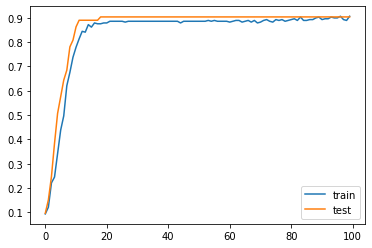

In [ ]:
plot.plot(history.history['accuracy'], label='train')
plot.plot(history.history['val_accuracy'], label='test')
plot.legend()
plot.show()

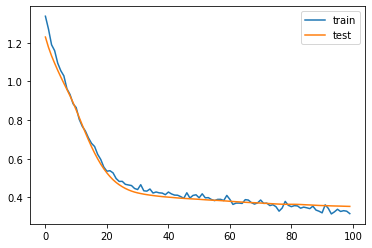

In [ ]:
plot.plot(history.history['loss'], label='train')
plot.plot(history.history['val_loss'], label='test')
plot.legend()
plot.show()

#OverSampler

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SVMSMOTE
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import (SMOTE, BorderlineSMOTE, SVMSMOTE, SMOTENC)
from sklearn.metrics import f1_score

In [ ]:
def train_model(x,y,epochs):
  model = Sequential()
  model.add(Dense(30, input_shape=(fn.feature_extractor.len_features*4,), activation='relu'))
  model.add(Dropout(0.3))
  model.add(Dense(10, activation='relu'))
  model.add(Dense(3, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy','mse'])
  history = model.fit(np.array(x), np.array(y), epochs=epochs, batch_size=250, verbose=1, validation_split=0.2)
  return model,history

In [ ]:
def over_sample(X, Y, oversampling = 'SVMSMOTE'):
  if oversampling == 'BorderlineSMOTE':
    sampling_strategy = "auto"
    ada = BorderlineSMOTE(sampling_strategy=sampling_strategy, random_state=0)
    Xo, Yo = ada.fit_resample(X, Y)

  elif oversampling == 'SVMSMOTE':
    sm = SVMSMOTE(random_state=0)
    Xo, Yo =sm.fit_resample(X, Y)

  elif oversampling == 'RandomOverSampler':
    rndsampler = RandomOverSampler(random_state=0)
    Xo, Yo =rndsampler.fit_resample(X, Y)
  elif oversampling == 'SMOTE':
    sm = SMOTE(random_state=0)
    Xo, Yo =sm.fit_resample(X, Y)
  elif oversampling == 'ADASYN':
    adsn = ADASYN(sampling_strategy='minority')
    Xo, Yo = adsn.fit_resample(X, Y) 
  return (Xo, Yo)

In [ ]:
Xo, Yo = over_sample(fn.X, fn.Y,'BorderlineSMOTE')
borderline_model = train_model(Xo, Yo,200)
output = borderline_model.predict_classes(np.array(fn.X))
f1_score(np.argmax(fn.Y,1), output,labels=[0,1,2,3],average='weighted')

Epoch 1/200
4/4 [==============================] - 1s 56ms/step - loss: 1.3841 - accuracy: 0.3187 - mse: 0.2676 - val_loss: 0.5847 - val_accuracy: 0.9227 - val_mse: 0.1125
Epoch 2/200
4/4 [==============================] - 0s 9ms/step - loss: 1.2808 - accuracy: 0.3239 - mse: 0.2543 - val_loss: 0.6397 - val_accuracy: 0.8969 - val_mse: 0.1236
Epoch 3/200
4/4 [==============================] - 0s 9ms/step - loss: 1.1741 - accuracy: 0.3523 - mse: 0.2367 - val_loss: 0.6898 - val_accuracy: 0.8660 - val_mse: 0.1329
Epoch 4/200
4/4 [==============================] - 0s 8ms/step - loss: 1.0967 - accuracy: 0.3613 - mse: 0.2220 - val_loss: 0.7529 - val_accuracy: 0.8454 - val_mse: 0.1462
Epoch 5/200
4/4 [==============================] - 0s 14ms/step - loss: 1.0520 - accuracy: 0.4052 - mse: 0.2129 - val_loss: 0.8177 - val_accuracy: 0.7938 - val_mse: 0.1601
Epoch 6/200
4/4 [==============================] - 0s 9ms/step - loss: 1.0232 - accuracy: 0.4090 - mse: 0.2066 - val_loss: 0.8877 - val_accurac

0.9805724034822184

In [ ]:
Xo, Yo = over_sample(fn.X, fn.Y,'SVMSMOTE')
borderline_model = train_model(Xo, Yo,200)
output = borderline_model.predict_classes(np.array(fn.X))
f1_score(np.argmax(fn.Y,1), output,labels=[0,1,2,3],average='weighted')

Epoch 1/200
3/3 [==============================] - 1s 82ms/step - loss: 1.1057 - accuracy: 0.3547 - mse: 0.2248 - val_loss: 2.1165 - val_accuracy: 0.0000e+00 - val_mse: 0.3621
Epoch 2/200
3/3 [==============================] - 0s 13ms/step - loss: 1.0564 - accuracy: 0.4074 - mse: 0.2155 - val_loss: 2.1084 - val_accuracy: 0.0000e+00 - val_mse: 0.3632
Epoch 3/200
3/3 [==============================] - 0s 13ms/step - loss: 1.0421 - accuracy: 0.4444 - mse: 0.2098 - val_loss: 2.1087 - val_accuracy: 0.0000e+00 - val_mse: 0.3654
Epoch 4/200
3/3 [==============================] - 0s 12ms/step - loss: 1.0112 - accuracy: 0.4701 - mse: 0.2050 - val_loss: 2.1016 - val_accuracy: 0.0000e+00 - val_mse: 0.3673
Epoch 5/200
3/3 [==============================] - 0s 13ms/step - loss: 0.9883 - accuracy: 0.4815 - mse: 0.2005 - val_loss: 2.0935 - val_accuracy: 0.0000e+00 - val_mse: 0.3692
Epoch 6/200
3/3 [==============================] - 0s 12ms/step - loss: 0.9633 - accuracy: 0.5256 - mse: 0.1941 - val_lo

0.9787647041398981

In [ ]:
Xo, Yo = over_sample(fn.X, fn.Y,'RandomOverSampler')
borderline_model = train_model(Xo, Yo,200)
output = borderline_model.predict_classes(np.array(fn.X))
f1_score(np.argmax(fn.Y,1), output,labels=[0,1,2,3],average='weighted')

Epoch 1/200
4/4 [==============================] - 1s 56ms/step - loss: 1.1460 - accuracy: 0.3935 - mse: 0.2310 - val_loss: 1.5492 - val_accuracy: 0.0000e+00 - val_mse: 0.3149
Epoch 2/200
4/4 [==============================] - 0s 10ms/step - loss: 1.1003 - accuracy: 0.4077 - mse: 0.2227 - val_loss: 1.5107 - val_accuracy: 0.0000e+00 - val_mse: 0.3092
Epoch 3/200
4/4 [==============================] - 0s 9ms/step - loss: 1.0880 - accuracy: 0.4194 - mse: 0.2200 - val_loss: 1.4560 - val_accuracy: 0.0000e+00 - val_mse: 0.3005
Epoch 4/200
4/4 [==============================] - 0s 8ms/step - loss: 1.0386 - accuracy: 0.4955 - mse: 0.2099 - val_loss: 1.4068 - val_accuracy: 0.0000e+00 - val_mse: 0.2924
Epoch 5/200
4/4 [==============================] - 0s 9ms/step - loss: 1.0133 - accuracy: 0.5123 - mse: 0.2041 - val_loss: 1.3513 - val_accuracy: 0.0000e+00 - val_mse: 0.2822
Epoch 6/200
4/4 [==============================] - 0s 9ms/step - loss: 0.9868 - accuracy: 0.4929 - mse: 0.1993 - val_loss: 

0.9867187656153761

In [ ]:
Xo, Yo = over_sample(fn.X, fn.Y,'SMOTE')
borderline_model = train_model(Xo, Yo,200)
output = borderline_model.predict_classes(np.array(fn.X))
f1_score(np.argmax(fn.Y,1), output,labels=[0,1,2,3],average='weighted')

Epoch 1/200
4/4 [==============================] - 1s 52ms/step - loss: 1.2212 - accuracy: 0.4116 - mse: 0.2360 - val_loss: 1.2011 - val_accuracy: 0.0206 - val_mse: 0.2512
Epoch 2/200
4/4 [==============================] - 0s 8ms/step - loss: 1.1653 - accuracy: 0.4052 - mse: 0.2291 - val_loss: 1.2976 - val_accuracy: 0.0155 - val_mse: 0.2691
Epoch 3/200
4/4 [==============================] - 0s 8ms/step - loss: 1.1443 - accuracy: 0.4026 - mse: 0.2268 - val_loss: 1.3758 - val_accuracy: 0.0000e+00 - val_mse: 0.2840
Epoch 4/200
4/4 [==============================] - 0s 8ms/step - loss: 1.0987 - accuracy: 0.4400 - mse: 0.2190 - val_loss: 1.4455 - val_accuracy: 0.0000e+00 - val_mse: 0.2970
Epoch 5/200
4/4 [==============================] - 0s 9ms/step - loss: 1.0593 - accuracy: 0.4632 - mse: 0.2118 - val_loss: 1.4918 - val_accuracy: 0.0000e+00 - val_mse: 0.3052
Epoch 6/200
4/4 [==============================] - 0s 8ms/step - loss: 1.0204 - accuracy: 0.4865 - mse: 0.2039 - val_loss: 1.5287 - 

0.9972663894833959

In [ ]:
Xo, Yo = over_sample(fn.X, fn.Y,'ADASYN')
borderline_model, history = train_model(Xo, Yo,200)
# output = borderline_model.predict_classes(np.array(fn.X))
# f1_score(np.argmax(fn.Y,1), output,labels=[0,1,2,3],average='weighted')

Epoch 1/200
3/3 [==============================] - 1s 114ms/step - loss: 1.1970 - accuracy: 0.3035 - mse: 0.2414 - val_loss: 0.9892 - val_accuracy: 0.7037 - val_mse: 0.1980
Epoch 2/200
3/3 [==============================] - 0s 16ms/step - loss: 1.1515 - accuracy: 0.3445 - mse: 0.2327 - val_loss: 1.0271 - val_accuracy: 0.3556 - val_mse: 0.2077
Epoch 3/200
3/3 [==============================] - 0s 15ms/step - loss: 1.1027 - accuracy: 0.3855 - mse: 0.2230 - val_loss: 1.0616 - val_accuracy: 0.1704 - val_mse: 0.2169
Epoch 4/200
3/3 [==============================] - 0s 17ms/step - loss: 1.0544 - accuracy: 0.4413 - mse: 0.2128 - val_loss: 1.0872 - val_accuracy: 0.0815 - val_mse: 0.2242
Epoch 5/200
3/3 [==============================] - 0s 16ms/step - loss: 1.0328 - accuracy: 0.4432 - mse: 0.2081 - val_loss: 1.1085 - val_accuracy: 0.0667 - val_mse: 0.2308
Epoch 6/200
3/3 [==============================] - 0s 15ms/step - loss: 1.0050 - accuracy: 0.4991 - mse: 0.2026 - val_loss: 1.1252 - val_ac

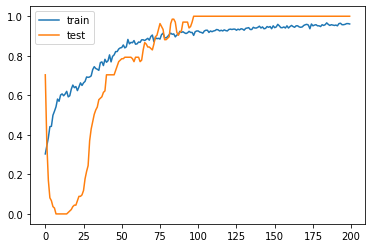

In [ ]:
plot.plot(history.history['accuracy'], label='train')
plot.plot(history.history['val_accuracy'], label='test')
plot.legend()
plot.show()

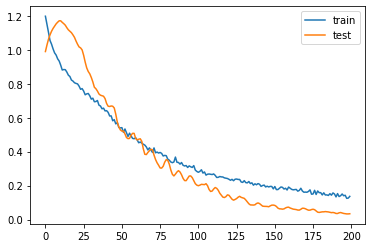

In [ ]:
plot.plot(history.history['loss'], label='train')
plot.plot(history.history['val_loss'], label='test')
plot.legend()
plot.show()